<a href="https://colab.research.google.com/github/md-sahabuddin-rhaju/Machine_learning/blob/main/Heart_disease%20project%20End_to_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

**Creating data dictionary**

>  age - age in years
>  sex - (1 = male; 0 = female)
>  cp - chest pain type


    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease


> 4: trestbps - resting blood pressure


(in mm Hg on admission to the  hospital) anything above 130-140 is typically cause for concern

> 5: chol - serum cholestoral in mg/dl
   serum = LDL + HDL + .2 * triglycerides
  above 200 is cause for concern

> 6: fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  '>126' mg/dL signals diabetes

> 7: restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber

> 8: thalach - maximum heart rate achieved

> 9: exang - exercise induced angina (1 = yes; 0 = no)

> 10: oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

> 11: slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

> 12: ca - number of major vessels (0-3) colored by flourosopy
      colored vessel means the doctor can see the blood passing    through the more blood movement the better (no clots)

> 13: thal - thalium stress result
  1,3: normal
  6: fixed defect: used to be defect but ok now
  7: reversable defect: no proper blood movement when excercising

> 14: target - have disease or not (1=yes, 0=no) (= the predicted attribute)


**Preparing the tools**

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
#  tuning the parameters that increase the model generalizability
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False
from sklearn.metrics import confusion_matrix, classification_report
# useful measure of the success of prediction when the classes are very imbalanced. Mathematically, it represents the ratio of true positive to the sum of true positive and false positive. Precision Score = TP / (FP + TP)
# recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.
# The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers.
from sklearn.metrics import precision_score, recall_score, f1_score
#  ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Dataset'
df = pd.read_csv(path+'/heart.csv')
df.shape # (rows, columns)

(1025, 14)

**Data Exploration (exploratory data analysis or EDA)**

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

  What question(s) are you trying to solve?

  What kind of data do we have and how do we treat different types?

  What's missing from the data and how do you deal with it?

  Where are the outliers and why should you care about them?

  How can you add, change or remove features to get more out of your data?

In [ ]:
# Let's find out how many of each class there
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

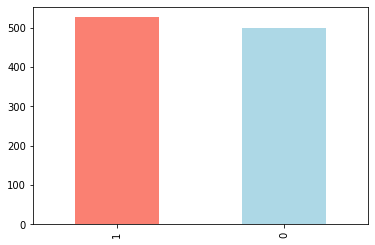

In [ ]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
#df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

#In this case, there are no missing values and all of our columns are numerical in nature.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB




> Another way to get some quick insights on your dataframe is to use df.describe(). describe() shows a range of different metrics about your numerical columns such as mean, max and standard deviation.




In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


** Heart Disease Frequency according to Gender**
If you want to compare two columns to each other, you can use the function pd.crosstab(column_1, column_2).



> This is helpful if what we want to start gaining an intuition about how our independent variables interact with our dependent variables.



Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [ ]:
df.sex.value_counts(), 
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple baseline, we'll try to beat it with machine learning.

**Making our crosstab visual**


You can plot the crosstab by using the plot() function and passing it a few parameters such as, kind (the type of plot you want), figsize=(length, width) (how big you want it to be) and color=[colour_1, colour_2] (the different colours you'd like to use).

Different metrics are represented best with different kinds of plots. In our case, a bar graph is great. We'll see examples of more later. And with a bit of practice, you'll gain an intuition of which plot to use with different variables.

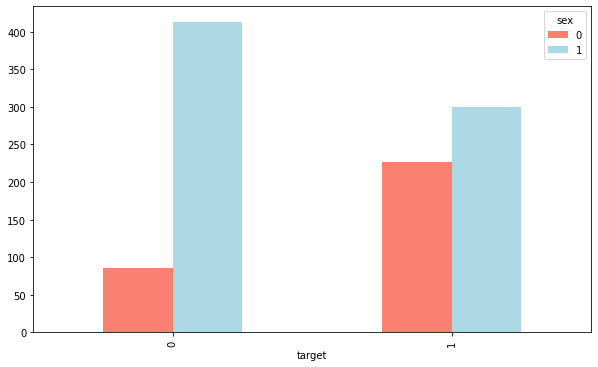

In [ ]:
# Creating a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

Nice! But our plot is looking pretty bare. Let's add some attributes.

We'll create the plot again with crosstab() and plot(), then add some helpful labels to it with plt.title(), plt.xlabel() and more.

To add the attributes, you call them on plt within the same cell as where you make create the graph.

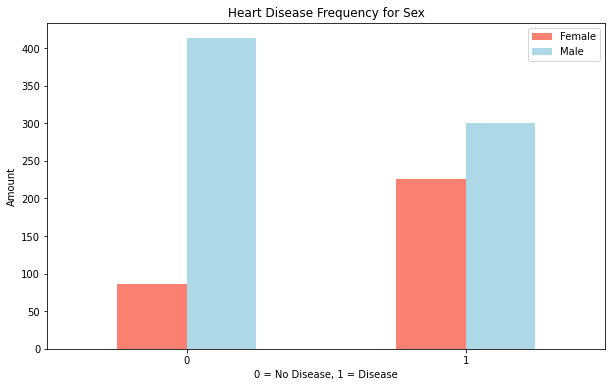

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

### Age vs Max Heart Rate for Heart Disease

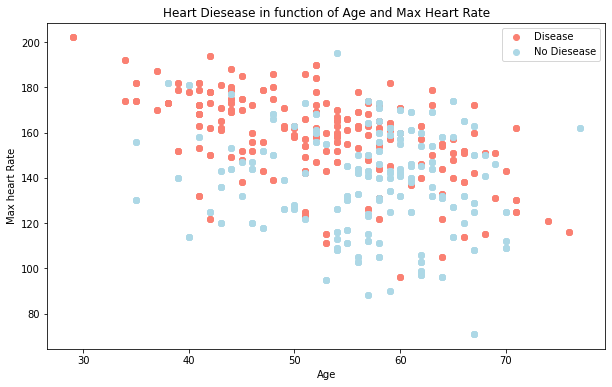

In [ ]:
#creating another figure
plt.figure(figsize=(10,6))

#scatter with positive Examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target == 1],
            c='salmon')

#scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target == 0],
            c='lightblue')
#Adding some helpful info
plt.title("Heart Diesease in function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel("Max heart Rate")
plt.legend(['Disease','No Diesease'])

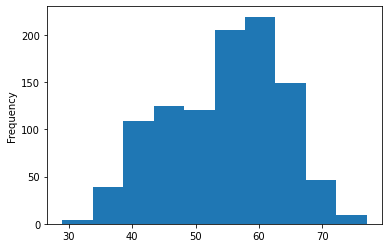

In [ ]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

# Heart Disease Frequency per Chest Pain Type
Let's try another independent variable. This time, **cp** (chest pain).

We'll use the same process as we did before with sex.

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


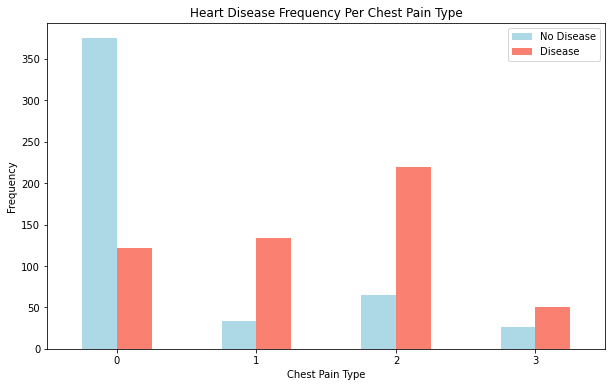

In [ ]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

# Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [ ]:
#finding correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


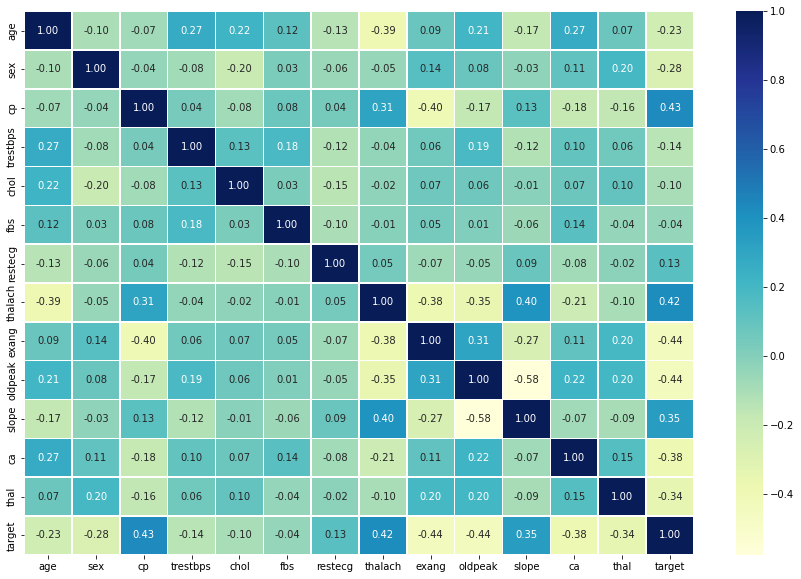

In [ ]:
#making it look a little prettier
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu")

A higher +ve value means a potential +ve correlation (increase)

and

A higher -ve value means a potential -ve correlation (decrease)

# Enough EDA, let's model
Remember, we do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using sex, the rest of the data seems to be pretty distributed.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.


A few extra things to remember:

> Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
> You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.


> We want to quickly find:


Distributions (df.column.hist())

Missing values (df.info())

Outliers

# 5. Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

> Remember our problem?

    Given clinical parameters about a patient, can we predict whether or not they have heart disease?

> That's what we'll be trying to answer. And remember our evaluation metric?

    If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

We're trying to predict our target variable using all of the other variables

To do this, we'll split the target variable from the rest

In [ ]:
# Everythin except target variable
X = df.drop('target', axis = 1)
# Target variable
y = df.target

#Training and Test Split
One of the most important concepts in macine learning, the **training/test split**

here, we have to split out data into a **training set** and **test set**


To split our data inot a trainning and tst set, we can use scikit learn's Train_test_split() and feed it our independent and dependent variables (X and y)

In [ ]:
# Random seed for reproducibility
np.random.seed(42)
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
X_train.head(), len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 835   49    1   2       118   149    0        0      126      0      0.8   
 137   64    0   0       180   325    0        1      154      1      0.0   
 534   54    0   2       108   267    0        0      167      0      0.0   
 495   59    1   0       135   234    0        1      161      0      0.5   
 244   51    1   2       125   245    1        0      166      0      2.4   
 
      slope  ca  thal  
 835      2   3     2  
 137      2   0     2  
 534      2   0     2  
 495      1   0     3  
 244      1   0     2  , 820)

In [ ]:
y_test.head(), len(y_test)

(527    1
 359    1
 447    0
 31     1
 621    0
 Name: target, dtype: int64, 205)

# Model Choices
At this point, we've got out data prepared, we can start to fit models. We'll be using the follwing and compaing their results
> 1. Logistic Regression - **LogisticRegression()**
> 2. K-nearest Neighbours - **KNeighboursClassifier**
> 3. RandomForest - - **RandomForestClassifier**

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(41)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.7317073170731707,
 'Logistic Regression': 0.7853658536585366,
 'Random Forest': 0.9853658536585366}

# Model Comparison


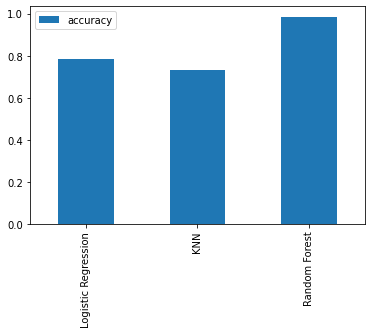

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [ ]:
#trying different values of n_neighbours
#creating a trainning score list
train_scores = []
#creating a list for testing score
test_scores = []
#creating a list of different values for n_neighbours
neighbors = range(1, 21)
#setting up the algorithm
knn = KNeighborsClassifier()
#loop through different neighbours values
for i in neighbors:
  knn.set_params(n_neighbors = i) #setting neighbours value
  #fitting the algorithm
  knn.fit(X_train, y_train)
  #updating the trainning scores
  train_scores.append(knn.score(X_train, y_train))
  #updating the testing scores
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [ ]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

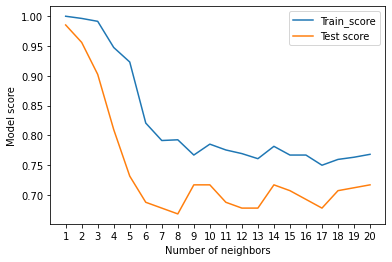

In [ ]:
#ploting these results
plt.plot(neighbors, train_scores, label="Train_score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [ ]:
#Setup random seed
np.random.seed(42)
#Setup random hyperparameter search for RandomForestClassifier
rs_rf =RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 510}

In [ ]:
rs_rf.score(X_test, y_test)

0.926829268292683

# Tuning a model with GridSearchCV

In [ ]:
#different logisticregression hyperparameters
log_reg_grid = {"C":np.logspace(-4,4,20),
"solver": ["liblinear"]}

#setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

#fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

# Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before

We want:












1.   ROC curve and AUC score - [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve) 

2.   Confusion matrix - confusion_matrix()

3.   Classification report - Classification_report()

4.   Precision - precision_score()

5.   recall - recall_score()

6.   F1-score - f1_score()







In [ ]:
#making prediction on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


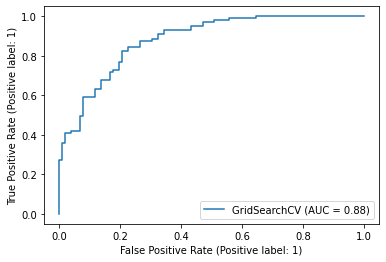

In [ ]:
#Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

#plotting Roc curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [ ]:
#displaying confusion matrix
print(confusion_matrix(y_test, y_preds))

[[71 31]
 [13 90]]


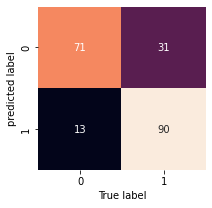

In [ ]:
def plot_con_max(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  sx = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("predicted label")


plot_con_max(y_test, y_preds)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [ ]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
#Importing cross_cal_score_
from sklearn.model_selection import cross_val_score

#Instantiate best model with best hyperparameter (found with GridSearchCV)
clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

In [ ]:
#Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.88780488, 0.85853659, 0.87317073, 0.8195122 , 0.8       ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8478048780487806

In [ ]:
cv_precision = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision"))
cv_precision

0.8226314773669621

In [ ]:
cv_recall = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="recall"))
cv_recall

0.8974303683737646

In [ ]:
cv_f1 = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1"))
cv_f1


0.8583430306540801

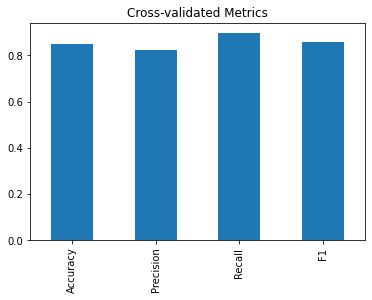

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1 },
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Metrics", legend=False)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.623776739188721, solver='liblinear')

In [ ]:
type(clf.coef_)
clf.coef_

array([[ 0.01245689, -1.68544402,  0.85198764, -0.01578096, -0.00828761,
        -0.20903191,  0.32008044,  0.03461353, -0.79648686, -0.65056533,
         0.56750662, -0.81568847, -1.04166391]])

In [ ]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012456889767138938,
 'ca': -0.8156884690315791,
 'chol': -0.008287611569400352,
 'cp': 0.8519876366750196,
 'exang': -0.796486864291127,
 'fbs': -0.2090319083260421,
 'oldpeak': -0.6505653264898916,
 'restecg': 0.32008043783454215,
 'sex': -1.685444021247855,
 'slope': 0.5675066198882789,
 'thal': -1.0416639061893234,
 'thalach': 0.03461353169715527,
 'trestbps': -0.015780957498061826}

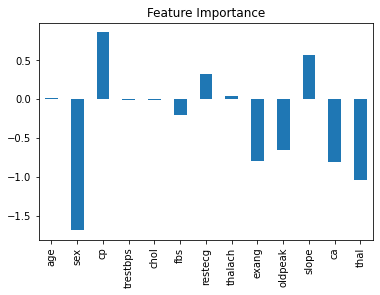

In [ ]:
features_df = pd.DataFrame(feature_dict, index=[0])
a = features_df.T.plot.bar(title= "Feature Importance", legend=False)


In [ ]:
type(a)

matplotlib.axes._subplots.AxesSubplot

In [ ]:
pd.crosstab(df["sex"], df["target"]) 

target,0,1
sex,,
0,86,226
1,413,300


In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])


target,0,1
slope,,
0,46,28
1,324,158
2,129,340
